Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("bike_data.csv")
print(df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


## Data Exploration

**TASK: Create a correlation heatmap.**

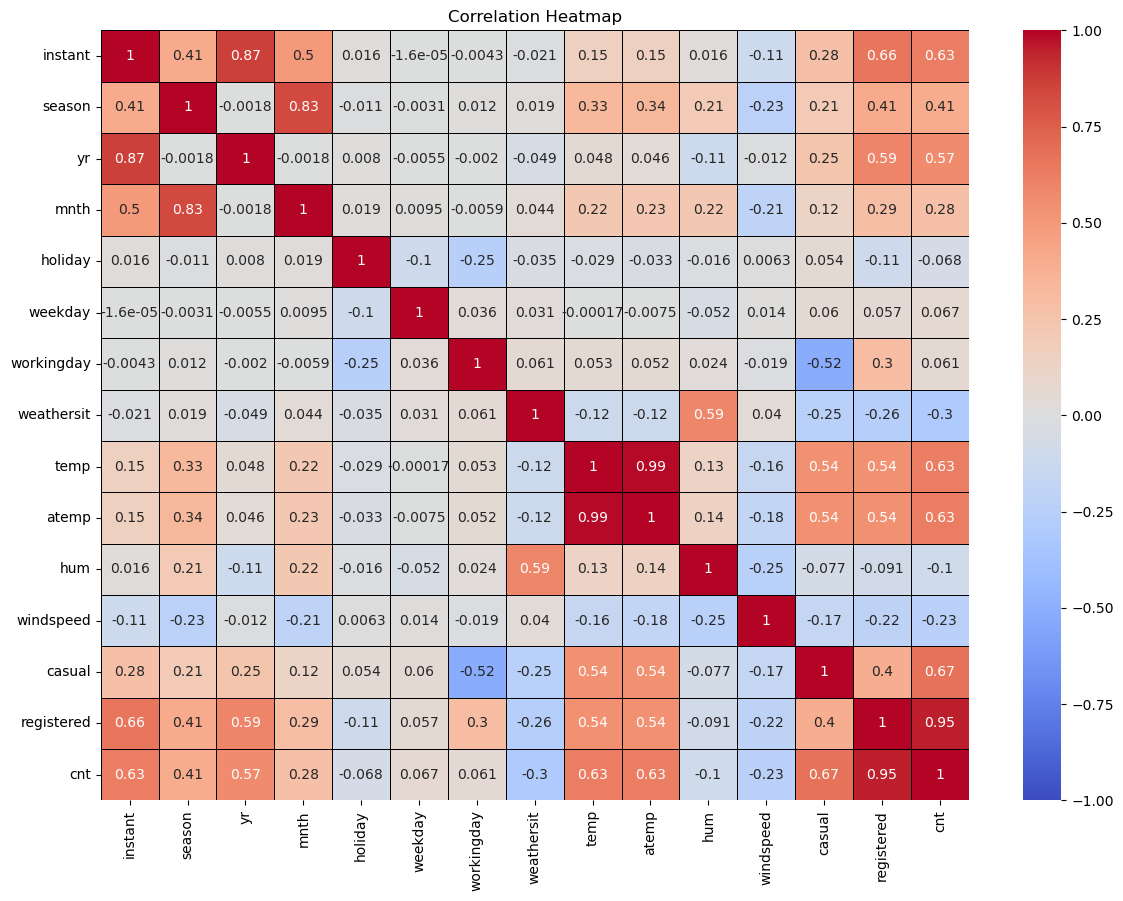

In [14]:
# Drop the 'dteday' column
df.drop('dteday', axis=1, inplace=True)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5, linecolor='black')

# Add title
plt.title('Correlation Heatmap')

# Show plot
plt.show()

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [15]:
# Calculate the absolute correlation of each feature with the target variable 'cnt'
correlation_with_target = df.corr()['cnt'].abs().sort_values(ascending=False)

# Print the top 5 correlated features with the target variable
top_correlated_features = correlation_with_target[1:6]  # Excluding 'cnt' itself
print("Top 5 correlated frequencies with the target variable 'cnt':")
print(top_correlated_features)

Top 5 correlated frequencies with the target variable 'cnt':
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
Name: cnt, dtype: float64


## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [16]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df.drop('cnt', axis=1)  # Features
y = df['cnt']                # Target/Label

# Split the data into a training set (90%) and a final test set (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=69)

# Further split the training set into training (90%) and validation (10%) for Cross-Validation
X_train_cv, X_val, y_train_cv, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

# Print the shapes of the resulting datasets
print("Shapes of the datasets:")
print(f"X_train_cv: {X_train_cv.shape}, y_train_cv: {y_train_cv.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Shapes of the datasets:
X_train_cv: (591, 14), y_train_cv: (591,)
X_val: (66, 14), y_val: (66,)
X_test: (74, 14), y_test: (74,)


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # StandardScaler for feature scaling
    ('knn', KNeighborsRegressor())     # KNeighborsRegressor model
])

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for k
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11]  # Various values of k
}

# Create GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best performing parameters:")
print(best_params)
print(f"Best negative mean squared error: {best_score}")

Best performing parameters:
{'knn__n_neighbors': 7}
Best negative mean squared error: 340072.6283216964


**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**